# 1. Trouver les données aberrantes et les supprimer.

Ne trouvant pas les métriques utiliser pour trouver les outliers dans le corpus de référence SQuAD, nous allons appliquer les calculs d'identification des données aberrantes sur d'autres valeurs.

Dans le cas de notre corpus, certains index correspondant à la place de la réponse dans le contexte sont indiqués à -1. Ce qui signifie que la réponse n'est pas exactement présente dans le texte de référence comme il est normalement le cas dans le corpus SQuAD.

Nous allons donc chercher les données aberrantes dans l'ensemble de ces index.

In [4]:
import pandas as pd

corpus = pd.read_csv("../data/clean/datas_chat.csv")

# Pour afficher tout le corpus, décommenter la ligne suivante :
# corpus

In [5]:
# utile dans le cas où le corpus fait beaucoup plus que 50 lignes

# test des fonctions pandas, visualisation du début du tableau
corpus.head()

,id,title,content,question,answer
0,1,capillarité,Cet article ne cite pas suffisamment ses sour...,Quelle force de tension se produit sur la capi...,"{'text': 'forces de tension superficielle', '..."
1,2,félidés,Félidés • Félins «Félin» redirige ici. Pour l...,Quel est le denier encêtre commun des félins m...,"{'text': 'Pseudaelurus', 'answer_start': 1238}"
2,3,sourire,"Pour les articles homonymes, voir Sourire (ho...",Que témoigne le sourire ?,"{'text': 'la sympathie', 'answer_start': 124}"
3,4,races,«Racial» redirige ici. Pour l’article homophon...,Que désigne le mot «race» ?,"{'text': ""des groupes d'une même espèce animal..."
4,5,toilette,"Pour les toiletteurs, voir Toiletteur . Le t...",Quand est apparue la tondeuse pour chien ?,"{'text': 'en 1850', 'answer_start': 648}"


In [6]:
# visualisation de la fin de notre tableau
corpus.tail()

,id,title,content,question,answer
45,46,2006,Cette page concerne l'année 2006 (MMVI en c...,L'année 2006 commence quel jour ?,"{'text': 'dimanche', 'answer_start': 4987}"
46,47,ronronnement,Vous lisez un « article de qualité » labellisé...,Quel est l'onomatopée du ronronnement ?,"{'text': 'ronron', 'answer_start': 104}"
47,48,argot,"Pour les articles ayant des titres homophones,...",Qu'est-ce qu'un argot ?,{'text': 'une variété linguistique spécifique ...
48,49,bon_article,En résumé: un bon article doit faire honneu...,"C'est quoi un label ""Bon article""",{'text': 'les articles qui ont été reconnus co...
49,50,1560,Cette page concerne l'année 1560 du calend...,L'année 1560 commence par quel jour ?,"{'text': 'un lundi', 'answer_start': 370}"


In [7]:
# informations sur l'ensemble de notre tableau et ce qu'il contient
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50 non-null     int64 
 1   title     50 non-null     object
 2   content   50 non-null     object
 3   question  50 non-null     object
 4   answer    50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


## a. Chercher les outliers dans les index des réponses (answer_start dans la colonne answer de notre csv)

In [8]:
# on observe la colonne qui contient les index des réponses
corpus["answer"]

0     {'text': 'forces de  tension superficielle', '...
1        {'text': 'Pseudaelurus', 'answer_start': 1238}
2         {'text': 'la sympathie', 'answer_start': 124}
3     {'text': "des groupes d'une même espèce animal...
4              {'text': 'en 1850', 'answer_start': 648}
5     {'text': 'la  ceinture scapulaire', 'answer_st...
6     {'text': '50% des poissons vivraient dans 17% ...
7     {'text': 'un tissu épithélial', 'answer_start'...
8     {'text': 'sa présence, de sa beauté, de sa jov...
9                {'text': 'miaou', 'answer_start': 127}
10             {'text': 'campagne', 'answer_start': 62}
11    {'text': 'forme solide ou liquide', 'answer_st...
12              {'text': 'Le chat', 'answer_start': -1}
13    {'text': 'entre l’ œsophage et le duodénum', '...
14             {'text': 'des sons', 'answer_start': -1}
15    {'text': "l'ablation des griffes", 'answer_sta...
16          {'text': 'le contact', 'answer_start': 892}
17    {'text': 'un handicap auditif', 'answer_st

In [9]:
import re

# on récupère tous les contenus de la colonne answer avec pandas
answers = pd.Series(corpus["answer"])
answers = list(answers)
# answers

# on va récupérer tous les index des réponses qu'on placera dans une liste
liste_index = []
for answer in answers:
    index = re.findall(r"(-?\d+)}", answer)
    liste_index.append(int(index[-1]))
liste_index

[614,
 1238,
 124,
 1217,
 648,
 486,
 599,
 -1,
 100,
 127,
 62,
 301,
 -1,
 -1,
 -1,
 -1,
 892,
 2106,
 668,
 -1,
 163,
 -1,
 258,
 -1,
 779,
 137,
 78,
 1094,
 -1,
 554,
 -1,
 -1,
 -1,
 -1,
 490,
 462,
 907,
 1036,
 1491,
 128,
 826,
 17,
 774,
 99,
 -1,
 4987,
 104,
 136,
 225,
 370]

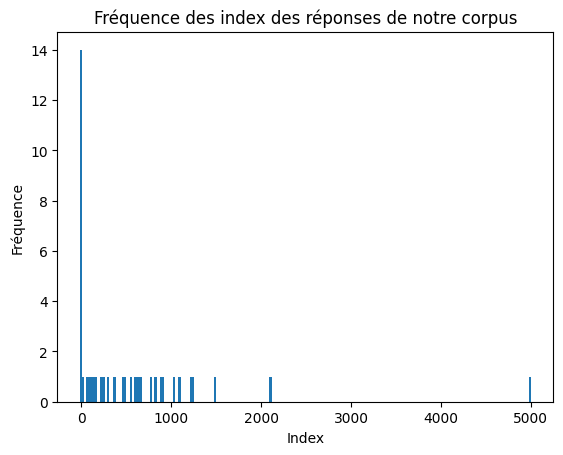

In [10]:
import matplotlib.pyplot as plt

# on va afficher ces résultats dans un graphique avec matplotlib
# pour mieux visualiser la répartition de ces chiffres

# on va débord compter la fréquence de chaque index
# dico des fréquences
frequences = {}

for index in liste_index:
    if index not in frequences.keys():
        frequences[index] = 1
    else:
        frequences[index] += 1

# liste des index
index = frequences.keys()

# liste de leurs fréquences
frequence = frequences.values()

# création du graphique
plt.title("Fréquence des index des réponses de notre corpus")
plt.bar(index, frequence, width=25)
plt.xlabel("Index")
plt.ylabel("Fréquence")
plt.show()

Cette méthode ne semble par appropriée car il se passe le contraire, comme les index sont très variés, il sont tous uniques, alors que là où il y a des index ç -1, ils sont plusieurs donc c'est là où le pic est le plus haut. 

Si nous appliquons la détection des valeurs aberrantes sur ces données, on va plutôt être amené à supprimer la valeur qui se trouve à l'index 5000 plutôt que les index situés à -1.

## b. Essai de détection des outliers sur la longueurs des contextes (colonne content dans notre csv)

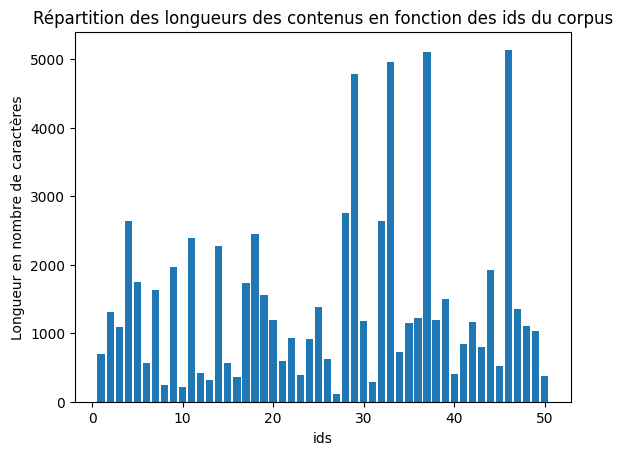

In [11]:
# Nous allons d'abord afficher les longueurs de nos contextes dans un graphique

# liste des ids de notre corpus :
ids = list(corpus["id"])

# liste des contenus :
contents = list(corpus["content"])

# liste des longueurs des contenus :
len_contents = []
for content in contents:
    longeur = len(content)
    len_contents.append(longeur)

# création du graphique
plt.title("Répartition des longueurs des contenus en fonction des ids du corpus")
plt.bar(ids, len_contents, width=0.8)
plt.xlabel("ids")
plt.ylabel("Longueur en nombre de caractères")
plt.show()

### On va venir calculer les écarts interquartiles sur la liste de nos longueurs de contenus.
L'hypothèse que nous pouvons émettre est que l'obtention de contenus trop grands ou trop petits serait du à une mauvaise aspiration de la page web : 
- trop petit : introduction wikipédia pas entièrement rédigée
- trop grand : récupération de données textuelles dépassant l'introduction seulement

In [12]:
# mettre dans l'ordre ascendant les longueurs de notre liste :
len_contents.sort()

# calcul de la médiane :
mediane = len(len_contents) / 2

print(
    "La médiane est située à",
    mediane,
    ", correspondant à la valeur",
    len_contents[int(mediane) - 1],
    ".\n",
)

# calcul des quartiles :
q1 = mediane / 2
valeur_q1 = len_contents[int(q1) - 1]
q3 = mediane + q1
valeur_q3 = len_contents[int(q3) - 1]

print(
    "Le premier quartile est située à",
    q1,
    ", correspondant à la valeur",
    valeur_q1,
    ".\n",
)
print(
    "Le 3eme quartile est située à", q3, ", correspondant à la valeur", valeur_q3, ".\n"
)

# Calcul de l'écart interquartile
ecart = valeur_q3 - valeur_q1

print("L'écart interquartile est de", ecart, ".\n")

La médiane est située à 25.0 , correspondant à la valeur 1150 .

Le premier quartile est située à 12.5 , correspondant à la valeur 558 .

Le 3eme quartile est située à 37.5 , correspondant à la valeur 1735 .

L'écart interquartile est de 1177 .



In [13]:
# Calcul de la borne inférieure : mise en évidence de valeurs aberrantes faibles.
borne_inf = valeur_q1 - (1.5 * ecart)
print("La borne inférieure est", borne_inf, ".\n")

# Calcul de la borne supérieure : mise en évidence de valeurs aberrantes élevées.
borne_sup = valeur_q3 + (1.5 * ecart)
print("La borne supérieure est", borne_sup, ".\n")

La borne inférieure est -1207.5 .

La borne supérieure est 3500.5 .



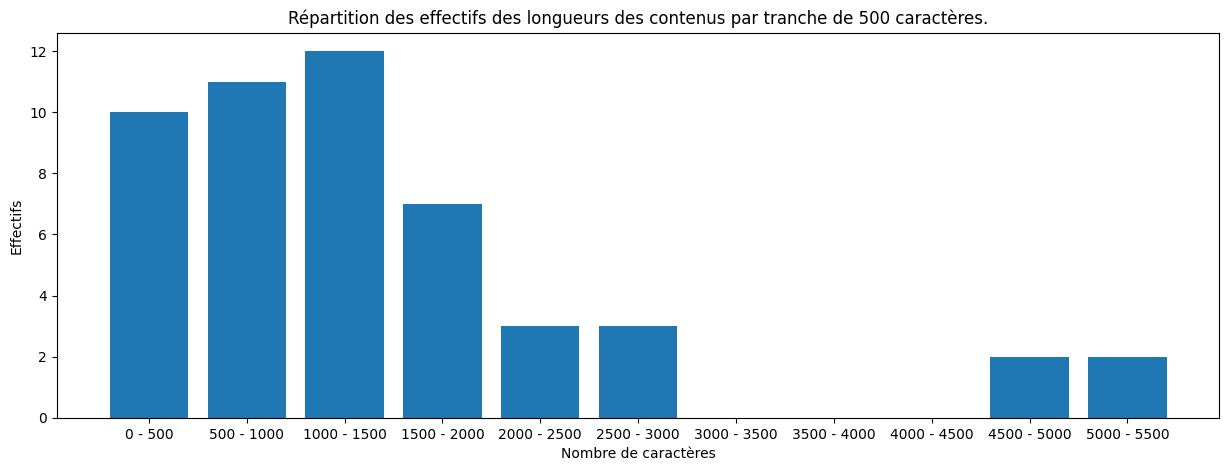

In [14]:
# on compte le nombre de contextes par tranche de 500
dico_tranche = {}

for tranche in [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]:
    # on met à 0 chaque effectif de tranche
    dico_tranche[f"{tranche - 500} - {tranche}"] = 0

    # on parcourt toute la liste de longueurs pour chaque tranche
    for longueur in len_contents:
        if (tranche - 500) < longueur <= tranche:
            dico_tranche[f"{tranche - 500} - {tranche}"] += 1
        else:
            continue

# on récupère les liste de clés et valeurs pour faire le graphique
liste_tranches = dico_tranche.keys()
liste_effectifs = dico_tranche.values()

# création du graphique avec les effectif par tranche
plt.figure(figsize=(15, 5))
plt.title(
    "Répartition des effectifs des longueurs des contenus par tranche de 500 caractères."
)
plt.bar(liste_tranches, liste_effectifs, width=0.8)
plt.xlabel("Nombre de caractères")
plt.ylabel("Effectifs")
plt.show()

Ce graphique permet d'observer une nette distinction entre les valeurs en dessous de 3500 caractères et celles au dessus. 

La borne supérieure située à 3500.5 que nous avons trouvé dans les calculs précédents semblent corrects.

Comme nous avons trouvé les données aberrantes par rapport aux longueurs des contenus, au nombre de 4, nous allons pouvoir commencer à nettoyer notre corpus en les supprimant.

La borne inférieure est en dessous de la longueur minimale que nous pouvons avoir dans le corpus, donc aucune autre donnée aberrante n'est à noter dans ces conditions.


In [15]:
# Suppression des données aberrantes avec la fonction .drop() de pandas
for i in list(corpus.index):
    # le i eme contexte :
    contexte = corpus.content[i]
    # la longueur du i eme contexte :
    len_contexte = len(contexte)
    # si longueur plus grande que la borne supérieur alors on supprime la ligne
    if len_contexte > 3500:
        corpus = corpus.drop(i, axis="index")
    else:
        continue

# Voici le corpus sous les outliers :
corpus

,id,title,content,question,answer
0,1,capillarité,Cet article ne cite pas suffisamment ses sour...,Quelle force de tension se produit sur la capi...,"{'text': 'forces de tension superficielle', '..."
1,2,félidés,Félidés • Félins «Félin» redirige ici. Pour l...,Quel est le denier encêtre commun des félins m...,"{'text': 'Pseudaelurus', 'answer_start': 1238}"
2,3,sourire,"Pour les articles homonymes, voir Sourire (ho...",Que témoigne le sourire ?,"{'text': 'la sympathie', 'answer_start': 124}"
3,4,races,«Racial» redirige ici. Pour l’article homophon...,Que désigne le mot «race» ?,"{'text': ""des groupes d'une même espèce animal..."
4,5,toilette,"Pour les toiletteurs, voir Toiletteur . Le t...",Quand est apparue la tondeuse pour chien ?,"{'text': 'en 1850', 'answer_start': 648}"
5,6,clavicule,Certaines informations figurant dans cet artic...,Où se situe la clavicule ?,"{'text': 'la ceinture scapulaire', 'answer_st..."
6,7,poisson,"Pour les articles homonymes, voir Poisson (ho...",Quel est la répartition des poissons dans l'oc...,{'text': '50% des poissons vivraient dans 17% ...
7,8,papilles,"En biologie et en anatomie , une papille ...",De quoi est composé une pupille ?,"{'text': 'un tissu épithélial', 'answer_start'..."
8,9,animaux_de_compagnie,Un animal de compagnie est un animal recev...,Qu'est ce qui est attendu d'un animal de compa...,"{'text': 'sa présence, de sa beauté, de sa jov..."
9,10,miaulement,Le miaulement est une vocalisation émise pa...,Quel est l'onomatopée du miaulement en français ?,"{'text': 'miaou', 'answer_start': 127}"


# 2. Retirer les doublons

Afin d'observer la présence de doublons dans notre corpus, nous avons les fonctions de pandas suivantes : 
- __.duplicated()__ : pour voir la présence de doublons ( False : pas de doublon, True : doublon )
- __.drop_duplicates()__ : retire tous les doublons du corpus

In [16]:
# Pour voir s'il y a des doublons, il y a la fonction .duplicated() de pandas :
corpus.duplicated()

# False = pas de doublon
# True = il y a doublon

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
29    False
30    False
31    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
46    False
47    False
48    False
49    False
dtype: bool

In [17]:
# Pour retirer les doublons, il y a la fonction .drop_duplcates() de pandas :
corpus.drop_duplicates()

# Ici c'est inutile car il n'y a aucun doublons dans notre corpus.

,id,title,content,question,answer
0,1,capillarité,Cet article ne cite pas suffisamment ses sour...,Quelle force de tension se produit sur la capi...,"{'text': 'forces de tension superficielle', '..."
1,2,félidés,Félidés • Félins «Félin» redirige ici. Pour l...,Quel est le denier encêtre commun des félins m...,"{'text': 'Pseudaelurus', 'answer_start': 1238}"
2,3,sourire,"Pour les articles homonymes, voir Sourire (ho...",Que témoigne le sourire ?,"{'text': 'la sympathie', 'answer_start': 124}"
3,4,races,«Racial» redirige ici. Pour l’article homophon...,Que désigne le mot «race» ?,"{'text': ""des groupes d'une même espèce animal..."
4,5,toilette,"Pour les toiletteurs, voir Toiletteur . Le t...",Quand est apparue la tondeuse pour chien ?,"{'text': 'en 1850', 'answer_start': 648}"
5,6,clavicule,Certaines informations figurant dans cet artic...,Où se situe la clavicule ?,"{'text': 'la ceinture scapulaire', 'answer_st..."
6,7,poisson,"Pour les articles homonymes, voir Poisson (ho...",Quel est la répartition des poissons dans l'oc...,{'text': '50% des poissons vivraient dans 17% ...
7,8,papilles,"En biologie et en anatomie , une papille ...",De quoi est composé une pupille ?,"{'text': 'un tissu épithélial', 'answer_start'..."
8,9,animaux_de_compagnie,Un animal de compagnie est un animal recev...,Qu'est ce qui est attendu d'un animal de compa...,"{'text': 'sa présence, de sa beauté, de sa jov..."
9,10,miaulement,Le miaulement est une vocalisation émise pa...,Quel est l'onomatopée du miaulement en français ?,"{'text': 'miaou', 'answer_start': 127}"


In [18]:
print(
    "La taille de notre corpus est de",
    len(corpus),
    "lignes des données après nettoyage des outliers et des doublons.",
)
print("La nettoyage a donc retiré", 50 - len(corpus), "lignes de données.\n")

La taille de notre corpus est de 46 lignes des données après nettoyage des outliers et des doublons.
La nettoyage a donc retiré 4 lignes de données.



# 3. Sauvegarde du nouveau corpus nettoyé

In [32]:
# Sauvegarde dans le dossier data/clean/ :
corpus.to_csv("../data/clean/clean_datas_chat.csv", index=False)